In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# RBE analysis starts here

In [14]:
data1 = np.load(dpath_npz+'rbe_stats_parallel_improved_shadow_RBEs.npz',allow_pickle=True)

In [15]:
new_data1 = data1['arr_0']
ww_list = list(new_data1)

In [16]:
max_length = [k[0] for k in ww_list]
eccen = [k[2] for k in ww_list]
max_area =[k[1] for k in ww_list]

In [17]:
np.where(np.isnan(max_length)==True)

(array([29181, 29325, 29481, 30030, 30039, 30061, 30067, 30094, 30118,
        30163, 30227, 30242, 30248, 30312, 30314, 30350, 30352, 30367,
        30377, 30420, 30444, 30448, 30460, 30463, 30485, 30489, 30507,
        30521, 30522, 30524, 30538, 30545, 30559, 30573, 30579, 30591,
        30592, 30594, 30598, 30600, 30605, 30611, 30613, 30616, 30621,
        30633, 30638, 30641, 30644, 30646, 30647, 30654, 30667, 30670,
        30683, 30690, 30695, 30696, 30698, 30700, 30703, 30709, 30712,
        30714, 30719, 30725, 30729, 30740, 30744, 30747, 30748, 30750,
        30751, 30752, 30756, 30757, 30758, 30759, 30761, 30762, 30763,
        30764, 30766, 30768, 30769, 30770, 30771, 30773, 30774, 30779,
        30782, 30783, 30784, 30785, 30788, 30789, 30790, 30795, 30796,
        30797, 30798, 30800, 30803, 30804, 30805, 30806, 30807, 30808,
        30809, 30810, 30811, 30814, 30816, 30818, 30819, 30820, 30821,
        30822, 30823, 30824, 30825, 30826, 30827, 30828, 30829, 30830,
      

In [18]:
final_eccen=[]
final_area=[]
consider_index =[]
for ii in range(len(eccen)):
    try:
        e = eccen[ii][0]
        final_eccen.append(e)
        a = max_area[ii][0]
        final_area.append(a)
        consider_index.append(ii)
    except:
        print('IndexError at',format(ii))

IndexError at 29181
IndexError at 29228
IndexError at 29325
IndexError at 29481
IndexError at 29694
IndexError at 29705
IndexError at 30030
IndexError at 30039
IndexError at 30061
IndexError at 30067
IndexError at 30094
IndexError at 30118
IndexError at 30163
IndexError at 30227
IndexError at 30229
IndexError at 30242
IndexError at 30248
IndexError at 30284
IndexError at 30285
IndexError at 30295
IndexError at 30304
IndexError at 30309
IndexError at 30312
IndexError at 30314
IndexError at 30323
IndexError at 30350
IndexError at 30352
IndexError at 30367
IndexError at 30369
IndexError at 30377
IndexError at 30401
IndexError at 30420
IndexError at 30421
IndexError at 30422
IndexError at 30444
IndexError at 30448
IndexError at 30459
IndexError at 30460
IndexError at 30463
IndexError at 30485
IndexError at 30489
IndexError at 30507
IndexError at 30514
IndexError at 30521
IndexError at 30522
IndexError at 30524
IndexError at 30538
IndexError at 30545
IndexError at 30548
IndexError at 30554


In [19]:
final_max_length=[]
for jj in range(len(consider_index)):
    final_max_length.append(max_length[consider_index[jj]])

In [20]:
final_max_length = np.array(final_max_length)
final_eccen = np.array(final_eccen)
final_area = np.array(final_area)

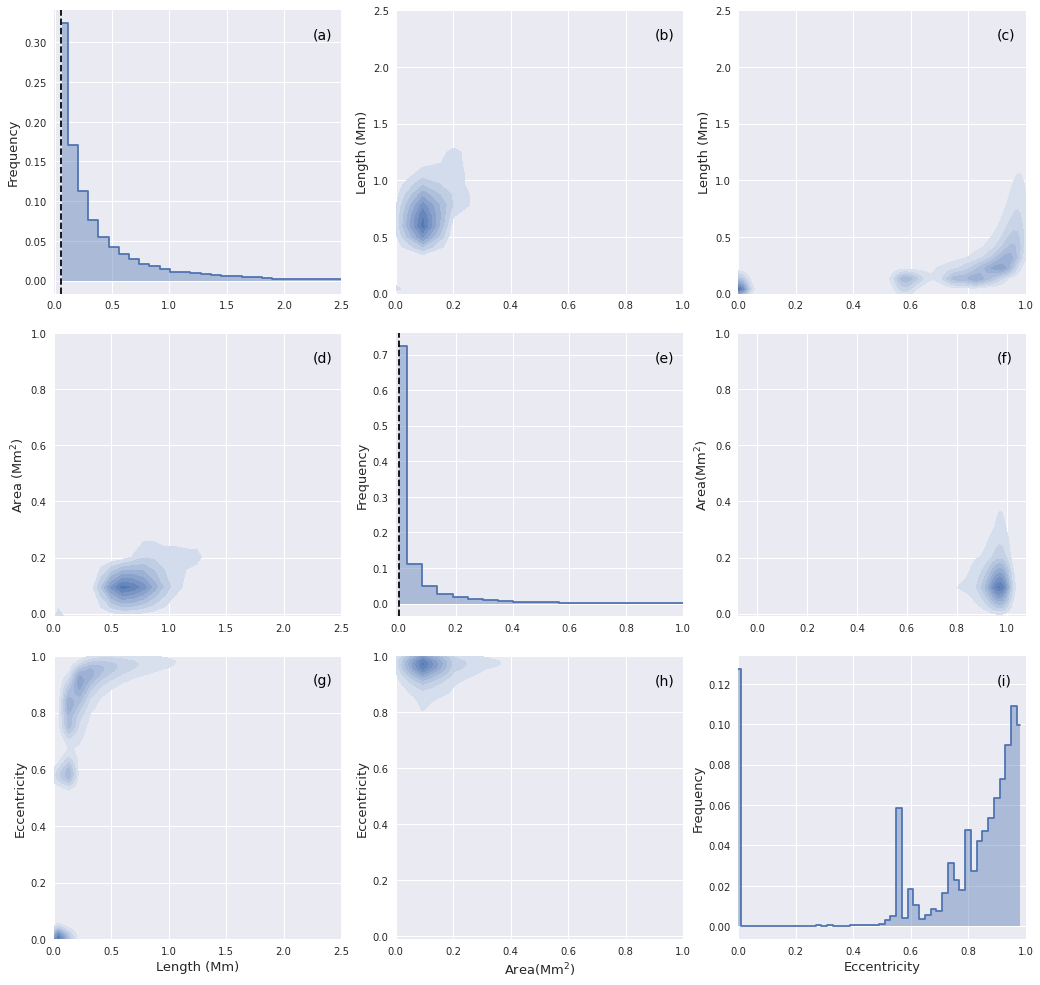

In [134]:
plt.style.use('seaborn-darkgrid')
fig, axs =plt.subplots(3,3,figsize=(15,15),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.14,wspace=0.19,left=0.05,right=0.95,top=0.93,bottom=0.07)
axs=axs.ravel()

n1, bins1 = np.histogram(final_max_length,bins= 100)
n1 = n1/np.sum(n1)
bins1 = bins1[:-1]
axs[0].plot(bins1, n1,drawstyle='steps-mid')
axs[0].fill_between(bins1,n1,step='mid',alpha=0.4)
axs[0].set_xlim(-0.01,2.5)
axs[0].set_ylabel('Frequency',fontsize=13)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axvline(x=0.037*0.722*2,color='black',linestyle='dashed')
axs[0].text(.9, .9, '(a)', transform=axs[0].transAxes, size=14,color='black')

h1 = sns.kdeplot(final_area,data2=final_max_length,shade=True,ax=axs[1],bw='scott',shade_lowest=False)
axs[1].set_xlim(0,1)
axs[1].set_ylim(0.0,2.5)
axs[1].set_ylabel(r'Length (Mm)',fontsize=13)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(.9, .9, '(b)', transform=axs[1].transAxes, size=14,color='black')

h2 = sns.kdeplot(final_eccen,data2=final_max_length,shade=True,ax=axs[2],bw='scott',shade_lowest=False)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,2.5)
#ax.set_xlabel('Eccentricity')
axs[2].set_ylabel(r'Length (Mm)',fontsize=13)
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].text(.9, .9, '(c)', transform=axs[2].transAxes, size=14,color='black')

h3 = sns.kdeplot(final_max_length,data2=final_area,shade=True,ax=axs[3],bw='scott',shade_lowest=False)
axs[3].set_xlim(0,2.5)
axs[3].set_ylim(-0.01,1)
axs[3].set_ylabel(r'Area (Mm$^{2}$)',fontsize=13)
axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].text(.9, .9, '(d)', transform=axs[3].transAxes, size=14,color='black')

n2, bins2 = np.histogram(final_area, bins=200)
n2 = n2/np.sum(n2)
bins2 = bins2[:-1]
axs[4].plot(bins2, n2,drawstyle='steps-mid')
axs[4].fill_between(bins2,n2,step='mid',alpha=0.4)
axs[4].set_xlim(-0.01,1)
axs[4].axvline(x=0.00143,color='black',linestyle='--')
#axs[2].set_xlabel(r'Area (Mm$^{2}$)',fontsize=12)
axs[4].set_ylabel('Frequency',fontsize=13)
axs[4].spines['right'].set_visible(False)
axs[4].spines['top'].set_visible(False)
axs[4].text(.9, .9, '(e)', transform=axs[4].transAxes, size=14,color='black')

h4 = sns.kdeplot((final_eccen),data2=(final_area),shade=True,ax=axs[5],bw='scott',shade_lowest=False)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
axs[5].set_ylim(-0.01,1.)
axs[5].set_ylabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[5].spines['right'].set_visible(False)
axs[5].spines['top'].set_visible(False)
axs[5].text(.9, .9, '(f)', transform=axs[5].transAxes, size=14,color='black')

h5 = sns.kdeplot(final_max_length,data2=final_eccen,shade=True,ax=axs[6],bw='scott',shade_lowest=False)
axs[6].set_xlim(0,2.5)
axs[6].set_ylim(0,1)
axs[6].set_xlabel('Length (Mm)',fontsize=13)
axs[6].set_ylabel(r'Eccentricity',fontsize=13)
axs[6].spines['right'].set_visible(False)
axs[6].spines['top'].set_visible(False)
axs[6].text(.9, .9, '(g)', transform=axs[6].transAxes, size=14,color='black')

h4 = sns.kdeplot((final_area),data2=(final_eccen),shade=True,ax=axs[7],bw='scott',shade_lowest=False)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
axs[7].set_ylim(-0.01,1.)
axs[7].set_xlim(0,1)
axs[7].set_xlabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[7].set_ylabel(r'Eccentricity',fontsize=13)
axs[7].spines['right'].set_visible(False)
axs[7].spines['top'].set_visible(False)
axs[7].text(.9, .9, '(h)', transform=axs[7].transAxes, size=14,color='black')

n, bins = np.histogram(final_eccen, 50)
n = n/np.sum(n)
bins = bins[:-1]
axs[8].plot(bins, n,drawstyle='steps-mid')
axs[8].fill_between(bins,n,step='mid',alpha=0.4)
axs[8].set_xlim(0,1)
axs[8].set_xlabel('Eccentricity',fontsize=13)
axs[8].set_ylabel('Frequency',fontsize=13)
axs[8].spines['right'].set_visible(False)
axs[8].spines['top'].set_visible(False)
axs[8].text(.9, .9, '(i)', transform=axs[8].transAxes, size=14,color='black')
plt.savefig('/mn/stornext/u3/souvikb/paper4_images/RBE_length_pairplots_sbstyle.pdf')

# The RRE analysis starts below

In [4]:
data2 = np.load(dpath_npz+'rbe_stats_parallel_improved_shadow_RREs.npz',allow_pickle=True)

In [5]:
new_data2 = data2['arr_0']
ww_list2 = list(new_data2)

In [6]:
max_length_rre = [k[0] for k in ww_list2]
eccen_rre = [k[2] for k in ww_list2]
max_area_rre =[k[1] for k in ww_list2]

In [7]:
np.where(np.isnan(max_length_rre)==True)

(array([25605, 26544, 26553, 26669, 26693, 26743, 26782, 26834, 26849,
        26916, 26941, 26958, 26993, 27003, 27037, 27053, 27063, 27079,
        27095, 27108, 27114, 27157, 27160, 27171, 27173, 27192, 27194,
        27203, 27206, 27218, 27221, 27223, 27227, 27228, 27231, 27232,
        27236, 27243, 27246, 27254, 27257, 27260, 27265, 27268, 27284,
        27286, 27290, 27292, 27296, 27298, 27299, 27303, 27304, 27314,
        27336, 27343, 27349, 27358, 27361, 27364, 27365, 27366, 27368,
        27371, 27372, 27373, 27374, 27384, 27385, 27388, 27389, 27392,
        27393, 27399, 27403, 27404, 27409, 27413, 27415, 27416, 27417,
        27421, 27422, 27425, 27429, 27431, 27433, 27436, 27437, 27440,
        27441, 27442, 27445, 27446, 27447, 27448, 27450, 27451, 27452,
        27454, 27455, 27456, 27457, 27461, 27462, 27463, 27464, 27466,
        27467, 27468, 27469, 27470, 27471, 27472, 27473, 27474, 27475,
        27478, 27479, 27480, 27481, 27482, 27483, 27484, 27485, 27486,
      

In [9]:
final_eccen_rre=[]
final_area_rre=[]
consider_index_rre =[]
for ii in range(len(eccen_rre)):
    try:
        e = eccen_rre[ii][0]
        final_eccen_rre.append(e)
        a = max_area_rre[ii][0]
        final_area_rre.append(a)
        consider_index_rre.append(ii)
    except:
        print('IndexError at',format(ii))
       # del_index.append(ii)

IndexError at 25605
IndexError at 26544
IndexError at 26553
IndexError at 26669
IndexError at 26693
IndexError at 26719
IndexError at 26743
IndexError at 26782
IndexError at 26824
IndexError at 26834
IndexError at 26849
IndexError at 26916
IndexError at 26941
IndexError at 26958
IndexError at 26966
IndexError at 26969
IndexError at 26975
IndexError at 26985
IndexError at 26993
IndexError at 27003
IndexError at 27012
IndexError at 27037
IndexError at 27053
IndexError at 27063
IndexError at 27079
IndexError at 27095
IndexError at 27108
IndexError at 27114
IndexError at 27135
IndexError at 27152
IndexError at 27157
IndexError at 27160
IndexError at 27161
IndexError at 27171
IndexError at 27173
IndexError at 27182
IndexError at 27192
IndexError at 27194
IndexError at 27203
IndexError at 27206
IndexError at 27218
IndexError at 27221
IndexError at 27223
IndexError at 27227
IndexError at 27228
IndexError at 27229
IndexError at 27231
IndexError at 27232
IndexError at 27236
IndexError at 27243


In [10]:
final_max_length_rre=[]
for jj in range(len(consider_index_rre)):
    final_max_length_rre.append(max_length_rre[consider_index_rre[jj]])

In [11]:
final_max_length_rre = np.array(final_max_length_rre)
final_eccen_rre = np.array(final_eccen_rre)
final_area_rre = np.array(final_area_rre)

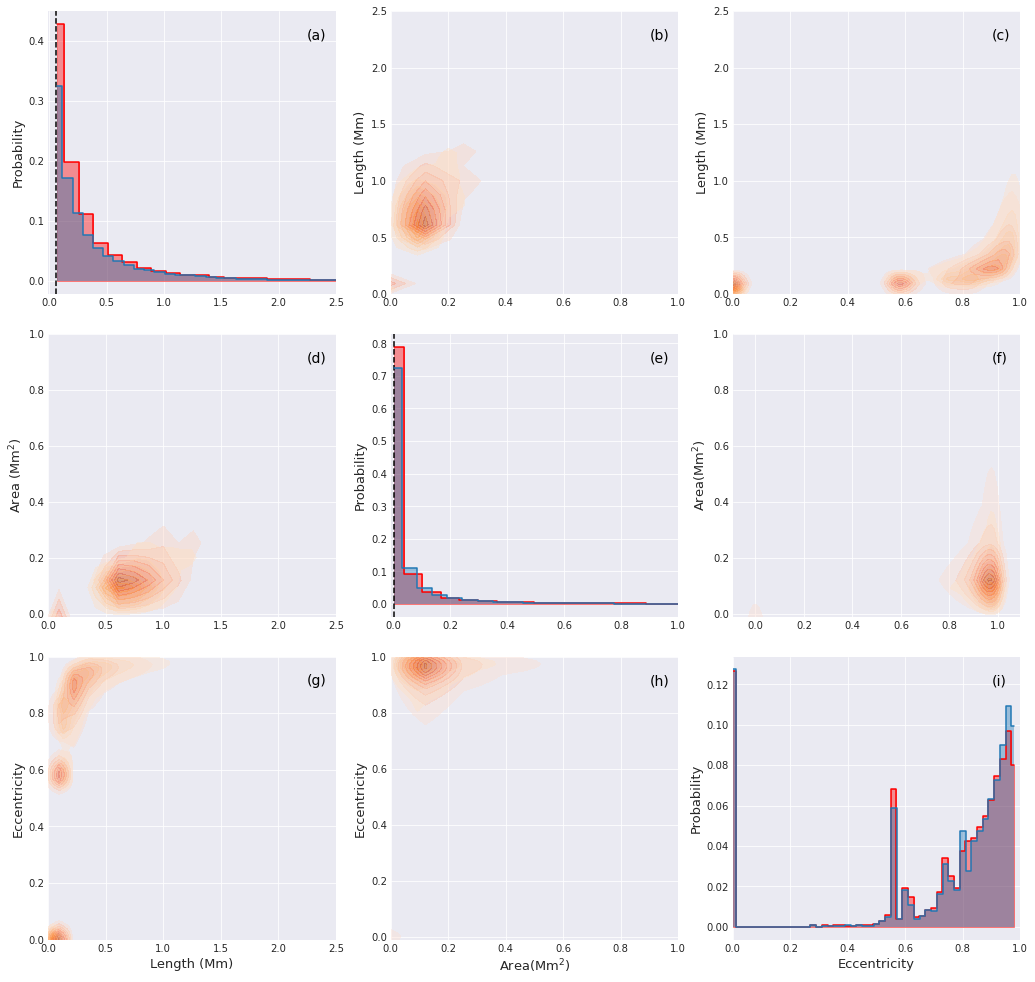

In [23]:
plt.style.use('seaborn-darkgrid')
fig, axs =plt.subplots(3,3,figsize=(15,15),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.14,wspace=0.19,left=0.05,right=0.95,top=0.93,bottom=0.07)
axs=axs.ravel()

n1, bins1 = np.histogram(final_max_length_rre,bins= 100)
n1 = n1/np.sum(n1)
bins1 = bins1[:-1]
axs[0].plot(bins1, n1,drawstyle='steps-mid',color='red')
axs[0].fill_between(bins1,n1,step='mid',alpha=0.4,color='red')
axs[0].set_xlim(-0.01,2.5)
axs[0].set_ylabel('Probability',fontsize=13)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axvline(x=0.037*0.722*2,color='black',linestyle='dashed')
axs[0].text(.9, .9, '(a)', transform=axs[0].transAxes, size=14,color='black')
n1_b, bins1_b = np.histogram(final_max_length,bins= 100)
n1_b = n1_b/np.sum(n1_b)
bins1_b = bins1_b[:-1]
axs[0].plot(bins1_b, n1_b,drawstyle='steps-mid')
axs[0].fill_between(bins1_b,n1_b,step='mid',alpha=0.4)



h1 = sns.kdeplot(final_area_rre,data2=final_max_length_rre,shade=True,ax=axs[1],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
axs[1].set_xlim(0,1)
axs[1].set_ylim(0.0,2.5)
axs[1].set_ylabel(r'Length (Mm)',fontsize=13)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(.9, .9, '(b)', transform=axs[1].transAxes, size=14,color='black')
h1_b = sns.kdeplot(final_area,data2=final_max_length,shade=True,ax=axs[1],bw='scott',shade_lowest=False,alpha=0.4)

h2 = sns.kdeplot(final_eccen_rre,data2=final_max_length_rre,shade=True,ax=axs[2],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,2.5)
#ax.set_xlabel('Eccentricity')
axs[2].set_ylabel(r'Length (Mm)',fontsize=13)
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].text(.9, .9, '(c)', transform=axs[2].transAxes, size=14,color='black')
h2_b = sns.kdeplot(final_eccen,data2=final_max_length,shade=True,ax=axs[2],bw='scott',shade_lowest=False,alpha=0.4)

h3 = sns.kdeplot(final_max_length_rre,data2=final_area_rre,shade=True,ax=axs[3],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
axs[3].set_xlim(0,2.5)
axs[3].set_ylim(-0.01,1)
axs[3].set_ylabel(r'Area (Mm$^{2}$)',fontsize=13)
axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].text(.9, .9, '(d)', transform=axs[3].transAxes, size=14,color='black')
h3_b = sns.kdeplot(final_max_length,data2=final_area,shade=True,ax=axs[3],bw='scott',shade_lowest=False,alpha=0.4)

n2, bins2 = np.histogram(final_area_rre, bins=200)
n2 = n2/np.sum(n2)
bins2 = bins2[:-1]
axs[4].plot(bins2, n2,drawstyle='steps-mid',color='red')
axs[4].fill_between(bins2,n2,step='mid',alpha=0.4,color='red')
axs[4].set_xlim(-0.01,1)
axs[4].axvline(x=0.00143,color='black',linestyle='--')
#axs[2].set_xlabel(r'Area (Mm$^{2}$)',fontsize=12)
axs[4].set_ylabel('Probability',fontsize=13)
axs[4].spines['right'].set_visible(False)
axs[4].spines['top'].set_visible(False)
axs[4].text(.9, .9, '(e)', transform=axs[4].transAxes, size=14,color='black')
n2_b, bins2_b = np.histogram(final_area, bins=200)
n2_b = n2_b/np.sum(n2_b)
bins2_b = bins2_b[:-1]
axs[4].plot(bins2_b, n2_b,drawstyle='steps-mid')
axs[4].fill_between(bins2_b,n2_b,step='mid',alpha=0.4)

h4 = sns.kdeplot((final_eccen_rre),data2=(final_area_rre),shade=True,ax=axs[5],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
axs[5].set_ylim(-0.01,1.)
axs[5].set_ylabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[5].spines['right'].set_visible(False)
axs[5].spines['top'].set_visible(False)
axs[5].text(.9, .9, '(f)', transform=axs[5].transAxes, size=14,color='black')
h4_b = sns.kdeplot((final_eccen),data2=(final_area),shade=True,ax=axs[5],bw='scott',shade_lowest=False,alpha=0.4)

h5 = sns.kdeplot(final_max_length_rre,data2=final_eccen_rre,shade=True,ax=axs[6],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
axs[6].set_xlim(0,2.5)
axs[6].set_ylim(0,1)
axs[6].set_xlabel('Length (Mm)',fontsize=13)
axs[6].set_ylabel(r'Eccentricity',fontsize=13)
axs[6].spines['right'].set_visible(False)
axs[6].spines['top'].set_visible(False)
axs[6].text(.9, .9, '(g)', transform=axs[6].transAxes, size=14,color='black')
h5_b = sns.kdeplot(final_max_length,data2=final_eccen,shade=True,ax=axs[6],bw='scott',shade_lowest=False,alpha=0.4)

h6 = sns.kdeplot((final_area_rre),data2=(final_eccen_rre),shade=True,ax=axs[7],bw='scott',shade_lowest=False,cmap='Reds',alpha=0.4)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
axs[7].set_ylim(-0.01,1.)
axs[7].set_xlim(0,1)
axs[7].set_xlabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[7].set_ylabel(r'Eccentricity',fontsize=13)
axs[7].spines['right'].set_visible(False)
axs[7].spines['top'].set_visible(False)
axs[7].text(.9, .9, '(h)', transform=axs[7].transAxes, size=14,color='black')
h6_b = sns.kdeplot((final_area),data2=(final_eccen),shade=True,ax=axs[7],bw='scott',shade_lowest=False,alpha=0.4)

n, bins = np.histogram(final_eccen_rre, 50)
n = n/np.sum(n)
bins = bins[:-1]
axs[8].plot(bins, n,drawstyle='steps-mid',color='red')
axs[8].fill_between(bins,n,step='mid',alpha=0.4,color='red')
axs[8].set_xlim(0,1)
axs[8].set_xlabel('Eccentricity',fontsize=13)
axs[8].set_ylabel('Probability',fontsize=13)
axs[8].spines['right'].set_visible(False)
axs[8].spines['top'].set_visible(False)
axs[8].text(.9, .9, '(i)', transform=axs[8].transAxes, size=14,color='black')
n_b, bins_b = np.histogram(final_eccen, 50)
n_b = n_b/np.sum(n_b)
bins_b = bins_b[:-1]
axs[8].plot(bins_b, n_b,drawstyle='steps-mid')
axs[8].fill_between(bins_b,n_b,step='mid',alpha=0.4)
plt.savefig('/mn/stornext/u3/souvikb/paper4_images/Combined_length_pairplots_sbstyle.pdf')

Text(0.5, 1.0, 'Area distrubution of RREs')

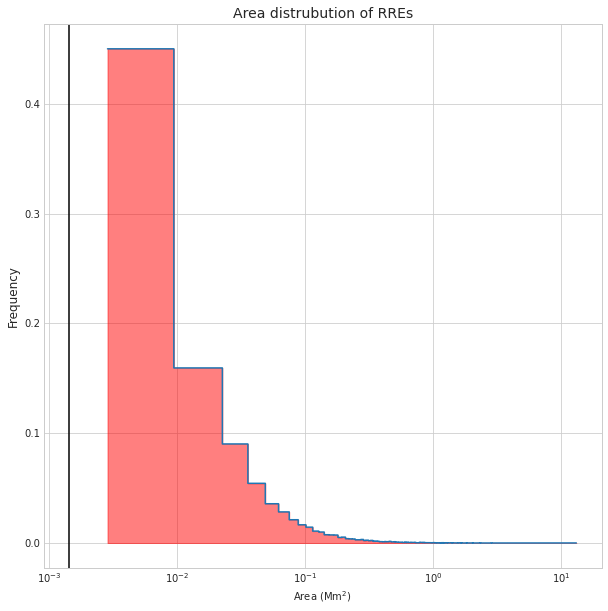

In [120]:
n2, bins2 = np.histogram(final_area_rre, 1000)
n2 = n2/n2.sum()
bins2 = bins2[:-1]
plt.figure(figsize=(10,10))
plt.plot(bins2, n2,drawstyle='steps-mid')
plt.fill_between(bins2,n2,step='mid',alpha=0.5,color='red')
#plt.xlim(-0.01,0.5)
plt.axvline(x=0.00143,color='black')
plt.xlabel(r'Area (Mm$^{2}$)')
plt.ylabel('Frequency',fontsize=12)
plt.xscale('log')
plt.title('Area distrubution of RREs',fontsize=14)

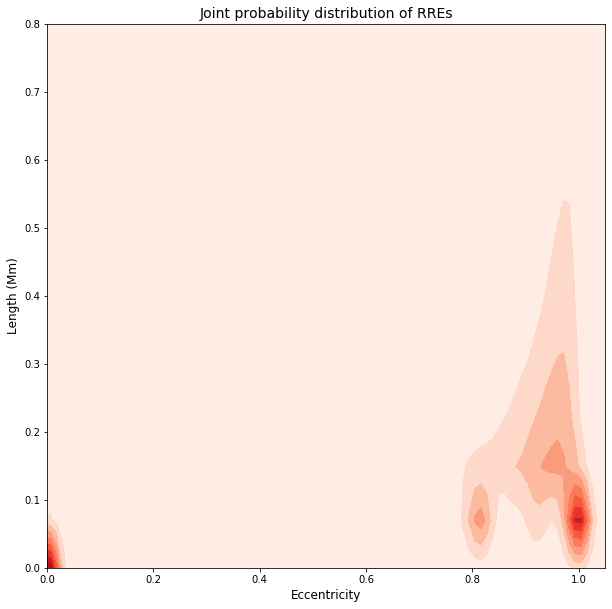

In [47]:
#JPDF between eccentricity of the fitted ellipses and the maximum length
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set(yscale="log",xscale='log')
h = sns.kdeplot(final_eccen_rre,data2=final_max_length_rre,shade=True,ax=ax,bw='scott',cmap='Reds')
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
ax.set_xlim(0,1.05)
ax.set_ylim(0,0.8)
ax.set_xlabel('Eccentricity',fontsize=12)
ax.set_ylabel(r'Length (Mm)',fontsize=12)
ax.set_title('Joint probability distribution of RREs',fontsize=14)
plt.show()

In [39]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap
mycmap1 = transparent_cmap(plt.cm.jet)
mycmap2 = transparent_cmap(plt.cm.jet)

[None, None]

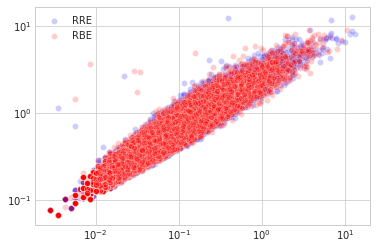

In [102]:
plt.style.use('seaborn-whitegrid')
#fig, ax = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k')

ax=sns.scatterplot(x=(final_area_rre),y=(final_max_length_rre),alpha=0.2,color='blue',label='RRE')
ax=sns.scatterplot(x=final_area,y=final_max_length,alpha=0.2,color='red',label='RBE')
plt.legend(loc='best')
#ax.set_xlim(0,5)
#ax.set_ylim(0.0,5)
ax.set(xscale="log", yscale="log")
#ax.set_yscale('log')
#ax.set_xscale('log')

[None]

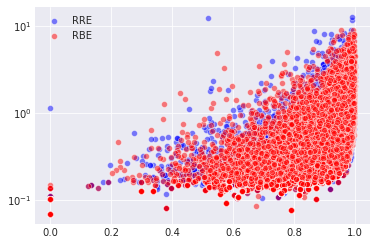

In [144]:
ax=sns.scatterplot(x=(final_eccen_rre),y=(final_max_length_rre),alpha=0.5,color='blue',label='RRE')
ax=sns.scatterplot(x=final_eccen,y=final_max_length,alpha=0.5,color='red',label='RBE')
plt.legend(loc='best')
ax.set(yscale='log')
#plt.xscale('log')

[None]

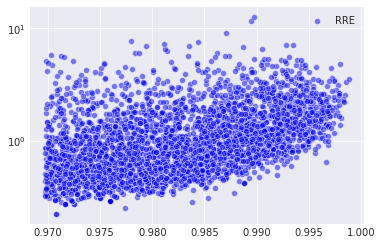

In [162]:
ax=sns.scatterplot(x=(final_eccen_rre[np.where(final_eccen_rre >= np.percentile(final_max_length_rre,90))]),y=(final_max_length_rre[np.where(final_eccen_rre >= np.percentile(final_max_length_rre,90))]),alpha=0.5,color='blue',label='RRE')
ax.set(yscale='log')

In [156]:
final_eccen_rre[np.where(final_eccen_rre >= np.percentile(final_max_length_rre,90))].shape

(3440,)

In [77]:
import scipy
X, Y = np.mgrid[final_area_rre.min():final_area_rre.max():100j, final_max_length_rre.min():final_max_length_rre.max():100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([final_area_rre, final_max_length_rre])
kernel = scipy.stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

In [75]:
Y.shape

(100, 100)

[None, None]

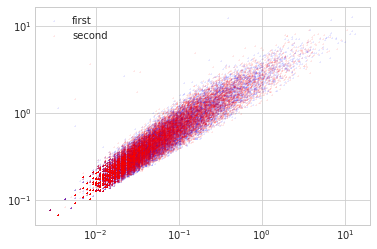

In [132]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.contourf(final_area_rre, final_max_length_rre, levels=100)
ax1.scatter(final_area, final_max_length, s=1, c='red', marker="+", label='second',alpha=0.1)
plt.legend()
ax1.set(xscale="log", yscale="log")

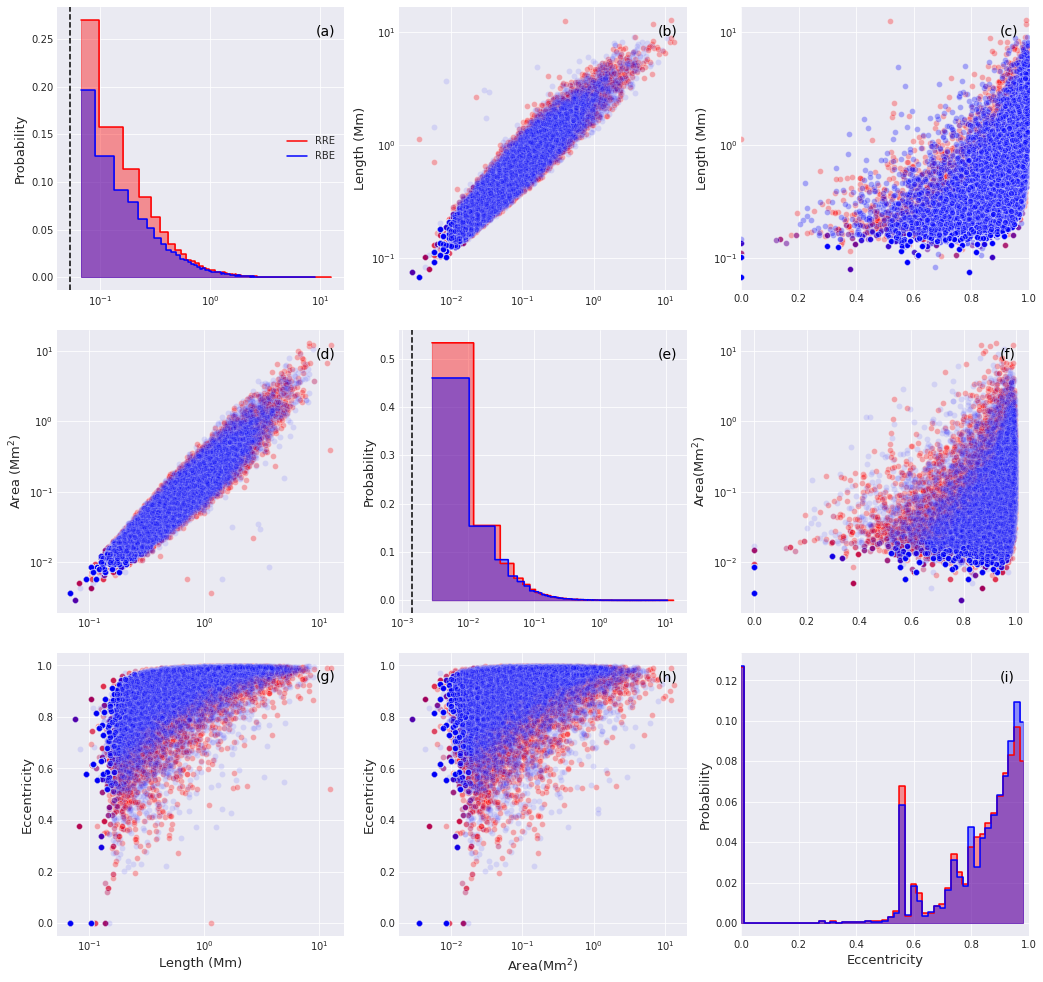

In [142]:
plt.style.use('seaborn-darkgrid')
fig, axs =plt.subplots(3,3,figsize=(15,15),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.14,wspace=0.19,left=0.05,right=0.95,top=0.93,bottom=0.07)
axs=axs.ravel()

n1, bins1 = np.histogram(final_max_length_rre,bins= 200)
n1 = n1/np.sum(n1)
bins1 = bins1[:-1]
axs[0].plot(bins1, n1,drawstyle='steps-mid',color='red',label='RRE')
axs[0].fill_between(bins1,n1,step='mid',alpha=0.4,color='red')
#axs[0].set_xlim(-0.01,2.5)
axs[0].set_ylabel('Probability',fontsize=13)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axvline(x=0.037*0.722*2,color='black',linestyle='dashed')
axs[0].text(.9, .9, '(a)', transform=axs[0].transAxes, size=14,color='black')
n1_b, bins1_b = np.histogram(final_max_length,bins= 200)
n1_b = n1_b/np.sum(n1_b)
bins1_b = bins1_b[:-1]
axs[0].plot(bins1_b, n1_b,drawstyle='steps-mid',color='blue', label='RBE')
axs[0].fill_between(bins1_b,n1_b,step='mid',alpha=0.4,color='blue')
axs[0].set_xscale('log')
axs[0].legend(loc=7)

h1 = sns.scatterplot(x=final_area_rre,y=final_max_length_rre,alpha=0.3,color='red',ax=axs[1])
#axs[1].set_xlim(0,1)
#axs[1].set_ylim(0.0,2.5)
axs[1].set_ylabel(r'Length (Mm)',fontsize=13)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].text(.9, .9, '(b)', transform=axs[1].transAxes, size=14,color='black')
h1_b = sns.scatterplot(x=final_area,y=final_max_length,alpha=0.1,color='blue',ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_xscale('log')

h2 = sns.scatterplot(x=final_eccen_rre,y=final_max_length_rre,alpha=0.3,color='red',ax=axs[2])
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
axs[2].set_xlim(0,1)
#axs[2].set_ylim(0,2.5)
#ax.set_xlabel('Eccentricity')
axs[2].set_ylabel(r'Length (Mm)',fontsize=13)
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].text(.9, .9, '(c)', transform=axs[2].transAxes, size=14,color='black')
h2_b = sns.scatterplot(x=final_eccen,y=final_max_length,alpha=0.3,color='blue',ax=axs[2])
axs[2].set_yscale('log')

h3 = sns.scatterplot(x=final_max_length_rre,y=final_area_rre,alpha=0.3,color='red',ax=axs[3])
#axs[3].set_xlim(0,2.5)
#axs[3].set_ylim(-0.01,1)
axs[3].set_ylabel(r'Area (Mm$^{2}$)',fontsize=13)
axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].text(.9, .9, '(d)', transform=axs[3].transAxes, size=14,color='black')
h3_b = sns.scatterplot(x=final_max_length,y=final_area,color='blue',ax=axs[3],alpha=0.1)
axs[3].set_xscale('log')
axs[3].set_yscale('log')

n2, bins2 = np.histogram(final_area_rre, bins=700)
n2 = n2/np.sum(n2)
bins2 = bins2[:-1]
axs[4].plot(bins2, n2,drawstyle='steps-mid',color='red')
axs[4].fill_between(bins2,n2,step='mid',alpha=0.4,color='red')
#axs[4].set_xlim(-0.01,1)
axs[4].axvline(x=0.00143,color='black',linestyle='--')
#axs[2].set_xlabel(r'Area (Mm$^{2}$)',fontsize=12)
axs[4].set_ylabel('Probability',fontsize=13)
axs[4].spines['right'].set_visible(False)
axs[4].spines['top'].set_visible(False)
axs[4].text(.9, .9, '(e)', transform=axs[4].transAxes, size=14,color='black')
n2_b, bins2_b = np.histogram(final_area, bins=700)
n2_b = n2_b/np.sum(n2_b)
bins2_b = bins2_b[:-1]
axs[4].plot(bins2_b, n2_b,drawstyle='steps-mid',color='blue')
axs[4].fill_between(bins2_b,n2_b,step='mid',alpha=0.4,color='blue')
axs[4].set_xscale('log')

h4 = sns.scatterplot(x=(final_eccen_rre),y=(final_area_rre),color='red',ax=axs[5],alpha=0.3)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
#axs[5].set_ylim(-0.01,1.)
axs[5].set_ylabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[5].spines['right'].set_visible(False)
axs[5].spines['top'].set_visible(False)
axs[5].text(.9, .9, '(f)', transform=axs[5].transAxes, size=14,color='black')
h4_b = sns.scatterplot(x=(final_eccen),y=(final_area),color='blue',ax=axs[5],alpha=0.1)
axs[5].set_yscale('log')

h5 = sns.scatterplot(x=final_max_length_rre,y=final_eccen_rre,color='red',ax=axs[6],alpha=0.3)
#axs[6].set_xlim(0,2.5)
#axs[6].set_ylim(0,1)
axs[6].set_xlabel('Length (Mm)',fontsize=13)
axs[6].set_ylabel(r'Eccentricity',fontsize=13)
axs[6].spines['right'].set_visible(False)
axs[6].spines['top'].set_visible(False)
axs[6].text(.9, .9, '(g)', transform=axs[6].transAxes, size=14,color='black')
h5_b = sns.scatterplot(x=final_max_length,y=final_eccen,color='blue',ax=axs[6],alpha=0.1)
#axs[6].set_yscale('log')
axs[6].set_xscale('log')

h6 = sns.scatterplot(x=(final_area_rre),y=(final_eccen_rre),color='red',ax=axs[7],alpha=0.3)
#h = sns.regplot(x=eccen,y=max_length,ax=ax,scatter_kws={"alpha":0.05})
#ax.set_xlim(0,1)
#axs[7].set_ylim(-0.01,1.)
#axs[7].set_xlim(0,1)
axs[7].set_xlabel(r'Area(Mm$^{2}$)',fontsize=13)
axs[7].set_ylabel(r'Eccentricity',fontsize=13)
axs[7].spines['right'].set_visible(False)
axs[7].spines['top'].set_visible(False)
axs[7].text(.9, .9, '(h)', transform=axs[7].transAxes, size=14,color='black')
h6_b = sns.scatterplot(x=(final_area),y=(final_eccen),color='blue',ax=axs[7],alpha=0.1)
#axs[7].set_yscale('log')
axs[7].set_xscale('log')

n, bins = np.histogram(final_eccen_rre, 50)
n = n/np.sum(n)
bins = bins[:-1]
axs[8].plot(bins, n,drawstyle='steps-mid',color='red')
axs[8].fill_between(bins,n,step='mid',alpha=0.4,color='red')
axs[8].set_xlim(0,1)
axs[8].set_xlabel('Eccentricity',fontsize=13)
axs[8].set_ylabel('Probability',fontsize=13)
axs[8].spines['right'].set_visible(False)
axs[8].spines['top'].set_visible(False)
axs[8].text(.9, .9, '(i)', transform=axs[8].transAxes, size=14,color='black')
n_b, bins_b = np.histogram(final_eccen, 50)
n_b = n_b/np.sum(n_b)
bins_b = bins_b[:-1]
axs[8].plot(bins_b, n_b,drawstyle='steps-mid',color='blue')
axs[8].fill_between(bins_b,n_b,step='mid',alpha=0.4,color='blue')

plt.savefig('/mn/stornext/u3/souvikb/paper4_images/Combined_length_pairplots_sbstyle.png')

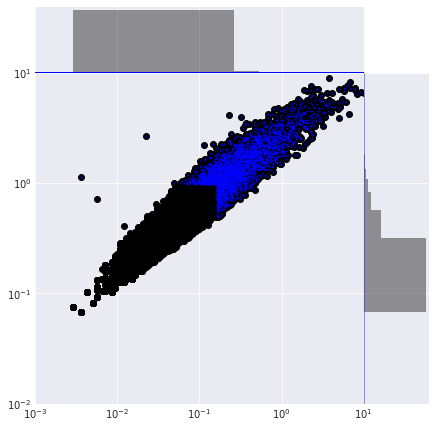

In [314]:
def myscatter(*args,**kwargs):
    kwargs['s']=0.5
    kwargs['color'] ='blue'
    kwargs['alpha'] =1
    
    filt = np.logical_or(
    args[0] >= np.percentile(final_area_rre,90),
    args[1] >= np.percentile(final_max_length_rre,90)
    )
    
    args = (args[0][filt],
           args[1][filt]
           )
    
    plt.scatter(*args,**kwargs)
    
mybins_x=np.logspace(0,np.log(200),100)
g = sns.jointplot(final_area_rre,final_max_length_rre,kind='scatter',space=0,color='black',xlim=(0.001,10),ylim=(0.01,10))
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue',bins=mybins)
g.plot_joint(myscatter)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

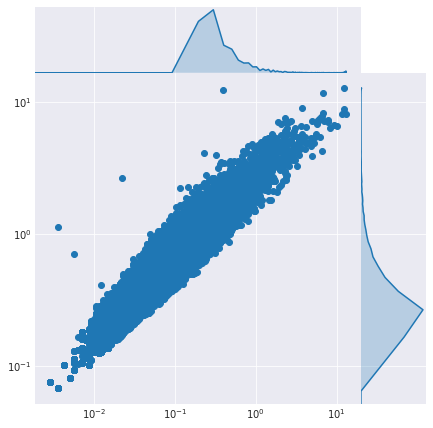

In [265]:
g = sns.JointGrid(x=final_area_rre, y=final_max_length_rre,space=0.)
g = g.plot_joint(plt.scatter, cmap="Blues")
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g = g.plot_marginals(sns.kdeplot, shade=True)
#g.plot_joint(myscatter)

g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

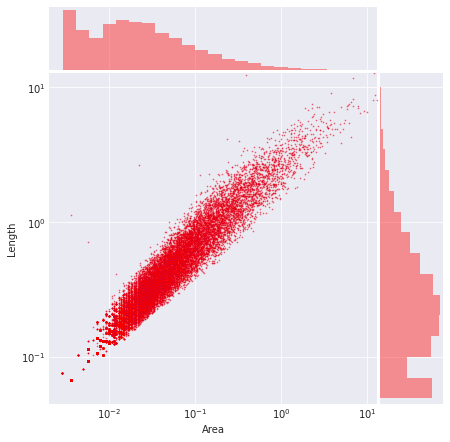

In [312]:
#The bottom one is the best one
g = sns.JointGrid(x=final_area_rre, y=final_max_length_rre,xlim=[0.002,final_area_rre.max()],ylim=[0.045,final_max_length_rre.max()],space=0.05)
g.plot_joint(plt.scatter, color='blue', edgecolor='red',s=0.5,alpha=0.5)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
#g = g.plot_marginals(sns.kdeplot, shade=True)
g.plot_marginals(sns.distplot, hist=True, kde=False, color='red',bins=np.logspace(-2.54,np.log10(10),24))
#g.ax_marg_x.hist(final_area_rre, color="b", alpha=.6,
                     #bins=np.logspace(-2.54,np.log10(10),500))
#g.ax_marg_y.hist(final_max_length_rre, color="r", alpha=.6,
                     #orientation="horizontal",
                     #bins=np.logspace(-2.54,np.log10(10),500))
#g = g.plot_marginals(sns.kdeplot, shade=True,color='blue')


g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')
g.set_axis_labels('Area','Length')

In [264]:
np.mean(final_area_rre)

0.08575410873071959

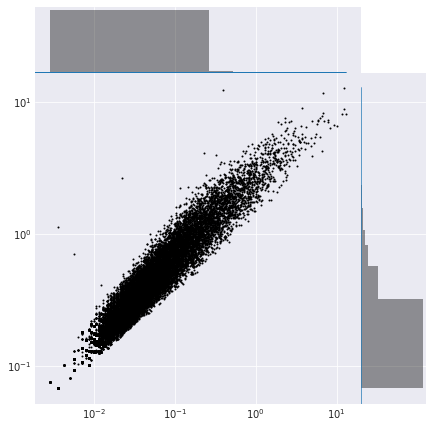

In [237]:
g = sns.jointplot(final_area_rre,final_max_length_rre,kind='scatter',space=0,color='black',s=1)
g = g.plot_marginals(sns.kdeplot, shade=True)
#g.plot_joint(sns.kdeplot, cmap="Blues",shade_lowest=False)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')

AttributeError: 'AxesSubplot' object has no attribute 'ax_joint'

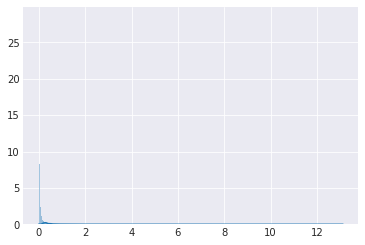

In [243]:
h2 = sns.scatterplot(x=final_eccen_rre,y=final_max_length_rre,alpha=0.3,color='red',ax=axs[2])


In [287]:
np.logspace(-2.54,np.log10(10),500).min()

0.0028840315031266055

In [283]:
final_area_rre.min()

0.002854551183999999